In [1]:
import pandas as pd
import numpy as np
import csv
import glob
import os
import re
import matplotlib.pyplot as plt
import yaml
import pickle
%matplotlib inline

In [2]:
unc_folder = "/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/"
conda_path = unc_folder + "conda/"
RMG_base_folder = unc_folder + "RMG-Py/"
RMG_db_folder = unc_folder + "RMG-database/"
conda_path = unc_folder + "conda/"
expt_yaml_file = ""
output_path  = "/scratch/blais.ch/methanol_results_2022_05_09/"

In [3]:
# we only want the ct_analysis files that were completed most recently, 
# which will have an objective function file with them
obj_func_filename = "objective_function_log2.txt"
# ct_filename = "ct_analysis_artol.csv"
ct_filename = "ct_analysis.csv"
ct_data_files = glob.glob(os.path.join(output_path,f"run_*/cantera/{ct_filename}"))

obj_func_files = [i.replace(ct_filename, obj_func_filename) for i in ct_data_files]

In [4]:
len(obj_func_files)

1417

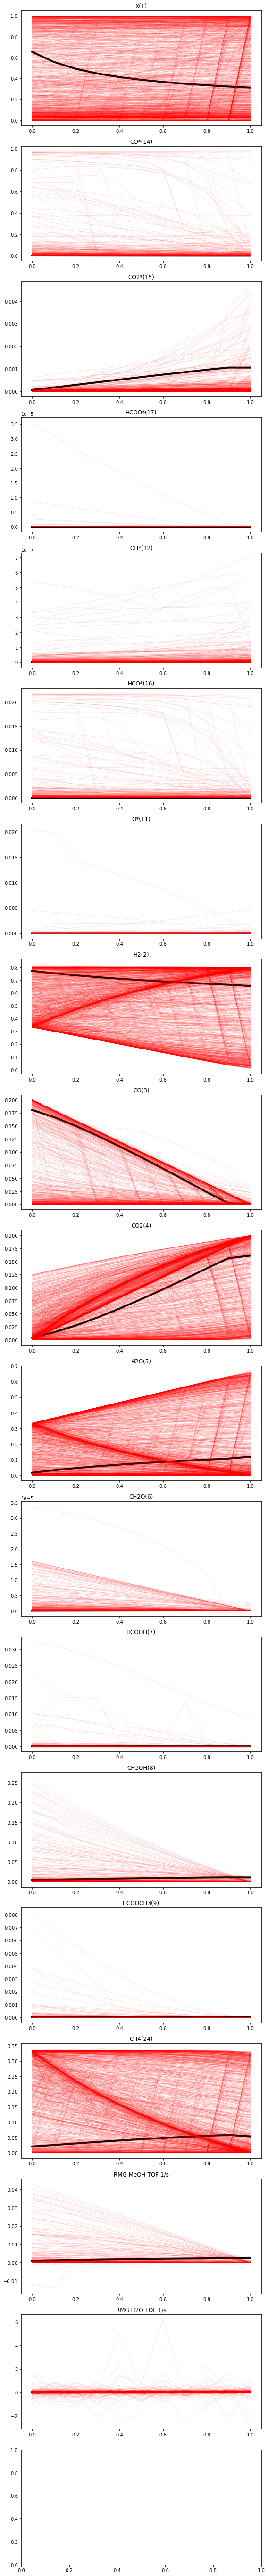

In [5]:
ct_data_dict = {}
model_size_dict = {}
pattern = re.compile('run_+\d')

# plt.rcParams['figure.figsize']=(1,1)

# things we want to plot
# first index is x-axis
data_keys = [
    "CO2/(CO2+CO)",
    "X(1)",
    "CO*(14)",
    "CO2*(15)",
    "HCOO*(17)",
    "OH*(12)",
    "HCO*(16)",
    "O*(11)",
    'H2(2)', 
    'CO(3)', 
    'CO2(4)',
    'H2O(5)', 
    'CH2O(6)', 
    'HCOOH(7)', 
    'CH3OH(8)', 
    'HCOOCH3(9)', 
    'CH4(24)',
    "RMG MeOH TOF 1/s",
    "RMG H2O TOF 1/s",
]

fig, axs = plt.subplots(nrows=len(data_keys), figsize=(8, 4 * len(data_keys)), tight_layout=True)
# fig.subplots_adjust(hspace=0.5, wspace=0.5)

for file in ct_data_files:
    
    # find the string for the run number 
    pattern = re.compile('run_\d{4}')
    match = re.search('run_\d{4}',file)
    run_num = int(match.group(0).replace('run_', ""))
    
    df = pd.read_csv(file)
    data_run = df[(df['Unnamed: 0'] >= 216) & (df['Unnamed: 0'] <= 226)]

#     ct_data_dict[run_num] = list(data_run["X(1)"])

    data_dict = {}
    
    # label best fit model with a black line
    if run_num == 3171:
        color = "k"
        alpha = 1.0
        linewidth=4
    else:
        color = "r"
        alpha = 0.1
        linewidth=1
    
    for key in data_keys:   
        data_dict[key] = list(data_run[key]) 
            
    for index, key in enumerate(data_keys):
        if index != 0:   
            data_dict[key] = list(data_run[key]) 
            axs[index-1].plot(
                data_dict[data_keys[0]], 
                data_dict[key], 
                color=color, 
                linewidth=linewidth, 
                alpha=alpha
            )
            
            axs[index-1].set_title(key)

## make activity maps for meoh and water
plot BE vs meoh TOF
- H vs C
- H vs O
- H vs vdw
- C vs O
- C vs vdw
- O vs vdw

In [56]:
# we only want the ct_analysis files that were completed most recently, 
# which will have an objective function file with them
obj_func_filename = "objective_function_log2.txt"
# ct_filename = "ct_analysis_artol.csv"
ct_filename = "ct_analysis.csv"
ct_data_files = glob.glob(os.path.join(output_path,f"run_*/cantera/{ct_filename}"))

obj_func_files = [i.replace(ct_filename, obj_func_filename) for i in ct_data_files]

In [57]:
for file in ct_data_files:
    if str(3171) in file:
        best_fit_model = file
        print(file)
        break

/scratch/blais.ch/methanol_results_2022_05_09/run_3171/cantera/ct_analysis.csv


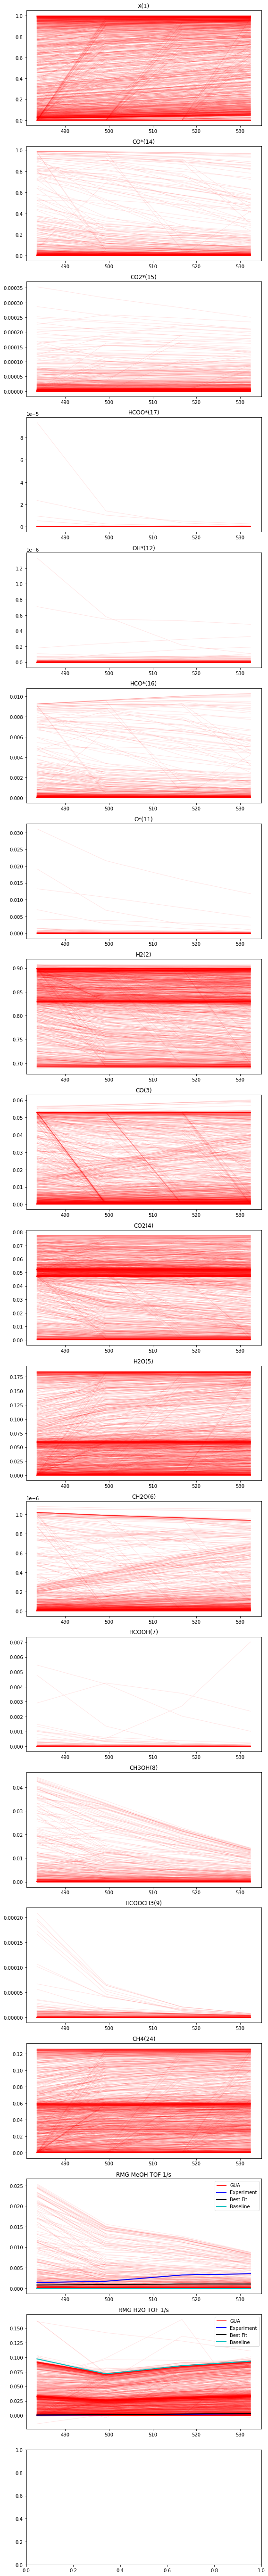

In [64]:
ct_data_dict = {}
model_size_dict = {}
pattern = re.compile('run_+\d')

# plt.rcParams['figure.figsize']=(1,1)

# things we want to plot
# first index is x-axis
data_keys = [
#     "CO2/(CO2+CO)",
    "T (K)",
    "X(1)",
    "CO*(14)",
    "CO2*(15)",
    "HCOO*(17)",
    "OH*(12)",
    "HCO*(16)",
    "O*(11)",
    'H2(2)', 
    'CO(3)', 
    'CO2(4)',
    'H2O(5)', 
    'CH2O(6)', 
    'HCOOH(7)', 
    'CH3OH(8)', 
    'HCOOCH3(9)', 
    'CH4(24)',
    "RMG MeOH TOF 1/s",
    "RMG H2O TOF 1/s",
]

fig, axs = plt.subplots(nrows=len(data_keys), figsize=(8, 4 * len(data_keys)), tight_layout=True)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

first_run = True
for file in ct_data_files:

    # find the string for the run number 
    pattern = re.compile('run_\d{4}')
    match = re.search('run_\d{4}',file)
    run_num = int(match.group(0).replace('run_', ""))
    
    df = pd.read_csv(file)
    data_run = df[(df['Unnamed: 0'] == 30) | (df['Unnamed: 0'] == 36) |(df['Unnamed: 0'] == 48)|(df['Unnamed: 0'] == 42)]

    data_dict = {}
    color = "r"
    alpha = 0.1
    linewidth=1
    zorder=0
    
    for key in data_keys:   
        data_dict[key] = list(data_run[key]) 
            
    for index, key in enumerate(data_keys):
        if index != 0:   
            data_dict[key] = list(data_run[key])
            if first_run:
                axs[index-1].plot(
                    data_dict[data_keys[0]], 
                    data_dict[key], 
                    color=color, 
                    linewidth=linewidth, 
                    alpha=alpha,
                    label="GUA",
                    zorder=zorder
                )
            else:
                axs[index-1].plot(
                    data_dict[data_keys[0]], 
                    data_dict[key], 
                    color=color, 
                    linewidth=linewidth, 
                    alpha=alpha,
                    label="_GUA",
                    zorder=zorder
                )
#             if key == "RMG H2O TOF 1/s" or key =="RMG MeOH TOF 1/s": 
# #                 axs[index-1].set_ylim(1e-1,0.005)
#                 axs[index-1].set_yscale("log")
            axs[index-1].set_title(key)
    first_run = False
    
# plot graaf data
axs[-3].plot(
    data_dict[data_keys[0]], 
    list(data_run["graaf MeOH TOF 1/s"]), 
    color="b", 
    linewidth=2.0, 
    alpha=1.0,
    label="Experiment",
    zorder=2
)

axs[-2].plot(
    data_dict[data_keys[0]], 
    list(data_run["graaf H2O TOF 1/s"]), 
    color="b", 
    linewidth=2.0, 
    alpha=1.0,
    label="Experiment",
    zorder=2
)

# plot best fit
df = pd.read_csv(best_fit_model)
data_run = df[(df['Unnamed: 0'] == 30) | (df['Unnamed: 0'] == 36) |(df['Unnamed: 0'] == 48)|(df['Unnamed: 0'] == 42)]

axs[-3].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG MeOH TOF 1/s"]), 
    color="k", 
    linewidth=2.0, 
    alpha=1.0,
    label="Best Fit",
    zorder=4
)

axs[-2].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG H2O TOF 1/s"]), 
    color="k", 
    linewidth=2.0, 
    alpha=1.0,
    label="Best Fit",
    zorder=4
)

# plot baseline data
df = pd.read_csv("/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/uncertainty_baseline/cantera/ct_analysis.csv")
data_run = df[(df['Unnamed: 0'] == 30) | (df['Unnamed: 0'] == 36) |(df['Unnamed: 0'] == 48)|(df['Unnamed: 0'] == 42)]

axs[-3].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG MeOH TOF 1/s"]), 
    color="c", 
    linewidth=2.0, 
    alpha=1.0,
    label="Baseline",
    zorder=3
)

axs[-2].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG H2O TOF 1/s"]), 
    color="c", 
    linewidth=2.0, 
    alpha=1.0,
    label="Baseline",
    zorder=3
)
axs[-2].legend()
axs[-3].legend()

leg = axs[-2].legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
leg = axs[-3].legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

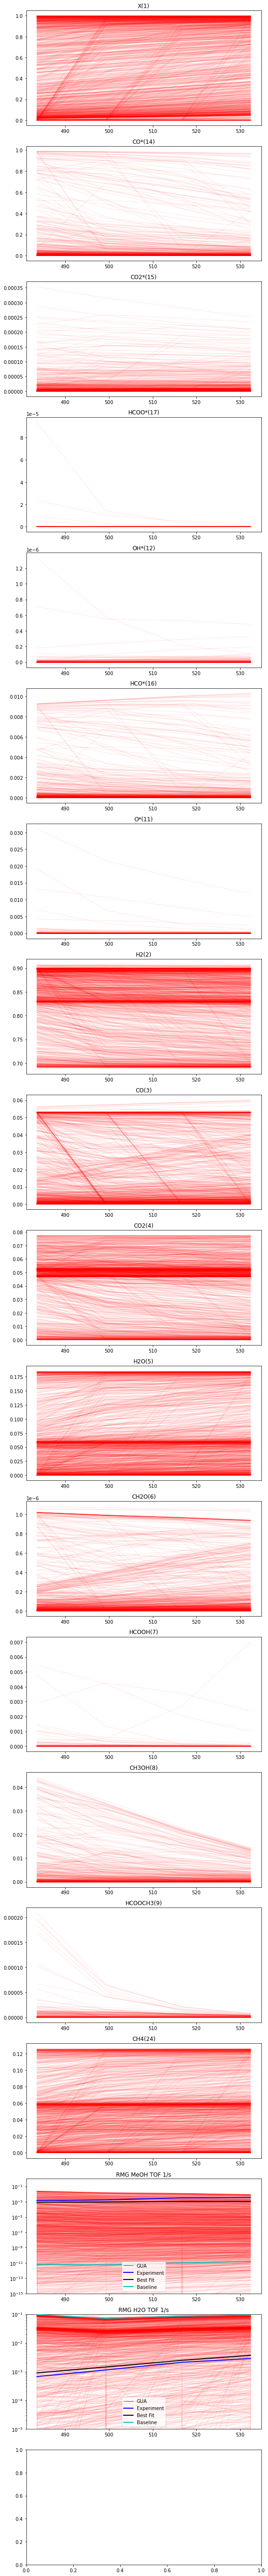

In [63]:
ct_data_dict = {}
model_size_dict = {}
pattern = re.compile('run_+\d')

# plt.rcParams['figure.figsize']=(1,1)

# things we want to plot
# first index is x-axis
data_keys = [
#     "CO2/(CO2+CO)",
    "T (K)",
    "X(1)",
    "CO*(14)",
    "CO2*(15)",
    "HCOO*(17)",
    "OH*(12)",
    "HCO*(16)",
    "O*(11)",
    'H2(2)', 
    'CO(3)', 
    'CO2(4)',
    'H2O(5)', 
    'CH2O(6)', 
    'HCOOH(7)', 
    'CH3OH(8)', 
    'HCOOCH3(9)', 
    'CH4(24)',
    "RMG MeOH TOF 1/s",
    "RMG H2O TOF 1/s",
]

fig, axs = plt.subplots(nrows=len(data_keys), figsize=(8, 4 * len(data_keys)), tight_layout=True)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

first_run = True
for file in ct_data_files:

    # find the string for the run number 
    pattern = re.compile('run_\d{4}')
    match = re.search('run_\d{4}',file)
    run_num = int(match.group(0).replace('run_', ""))
    
    df = pd.read_csv(file)
    data_run = df[(df['Unnamed: 0'] == 30) | (df['Unnamed: 0'] == 36) |(df['Unnamed: 0'] == 48)|(df['Unnamed: 0'] == 42)]

    data_dict = {}
    color = "r"
    alpha = 0.1
    linewidth=1
    zorder=0
    
    for key in data_keys:   
        data_dict[key] = list(data_run[key]) 
            
    for index, key in enumerate(data_keys):
        if index != 0:   
            data_dict[key] = list(data_run[key])
            if first_run:
                axs[index-1].plot(
                    data_dict[data_keys[0]], 
                    data_dict[key], 
                    color=color, 
                    linewidth=linewidth, 
                    alpha=alpha,
                    label="GUA",
                    zorder=zorder
                )
            else:
                axs[index-1].plot(
                    data_dict[data_keys[0]], 
                    data_dict[key], 
                    color=color, 
                    linewidth=linewidth, 
                    alpha=alpha,
                    label="_GUA",
                    zorder=zorder
                )
            axs[index-1].set_title(key)
    first_run = False
    
# plot graaf data
axs[-3].plot(
    data_dict[data_keys[0]], 
    list(data_run["graaf MeOH TOF 1/s"]), 
    color="b", 
    linewidth=2.0, 
    alpha=1.0,
    label="Experiment",
    zorder=2
)

axs[-2].plot(
    data_dict[data_keys[0]], 
    list(data_run["graaf H2O TOF 1/s"]), 
    color="b", 
    linewidth=2.0, 
    alpha=1.0,
    label="Experiment",
    zorder=2
)

# plot best fit
df = pd.read_csv(best_fit_model)
data_run = df[(df['Unnamed: 0'] == 30) | (df['Unnamed: 0'] == 36) |(df['Unnamed: 0'] == 48)|(df['Unnamed: 0'] == 42)]

axs[-3].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG MeOH TOF 1/s"]), 
    color="k", 
    linewidth=2.0, 
    alpha=1.0,
    label="Best Fit",
    zorder=4
)

axs[-2].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG H2O TOF 1/s"]), 
    color="k", 
    linewidth=2.0, 
    alpha=1.0,
    label="Best Fit",
    zorder=4
)

# plot baseline data
df = pd.read_csv("/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/uncertainty_baseline/cantera/ct_analysis.csv")
data_run = df[(df['Unnamed: 0'] == 30) | (df['Unnamed: 0'] == 36) |(df['Unnamed: 0'] == 48)|(df['Unnamed: 0'] == 42)]

axs[-3].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG MeOH TOF 1/s"]), 
    color="c", 
    linewidth=2.0, 
    alpha=1.0,
    label="Baseline",
    zorder=3
)

axs[-2].plot(
    list(data_run["T (K)"]), 
    list(data_run["RMG H2O TOF 1/s"]), 
    color="c", 
    linewidth=2.0, 
    alpha=1.0,
    label="Baseline",
    zorder=3
)
axs[-2].legend()
axs[-3].legend()


axs[-2].set_ylim(1e-5,1e-1)
axs[-2].set_yscale("log")

axs[-3].set_ylim(1e-15,1)
axs[-3].set_yscale("log")

leg = axs[-2].legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
leg = axs[-3].legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [23]:
data_run["RMG MeOH TOF 1/s"]

30    0.097014
36    0.071296
42    0.085235
48    0.092959
Name: RMG H2O TOF 1/s, dtype: float64

In [8]:
df[(df['Unnamed: 0'] == 29) | (df['Unnamed: 0'] == 36) |(df['Unnamed: 0'] == 48)|(df['Unnamed: 0'] == 42)]

Unnamed: 0  experiment  use_for_opt     time (s)  T (K)        P (Pa)  \
29          29  graaf_1988         True  3384.683421  483.5  1.510000e+06   
36          36  graaf_1988         True  2316.806227  499.3  1.500000e+06   
42          42  graaf_1988         True  1538.883116  516.7  1.510000e+06   
48          48  graaf_1988        False    13.807810  532.4  1.510000e+06   

    V (m^3/s)  x_CO initial  x_CO2 initial  x_H2 initial  ...  \
29   0.000010         0.053          0.047           0.9  ...   
36   0.000015         0.053          0.047           0.9  ...   
42   0.000018         0.053          0.047           0.9  ...   
48   0.000020         0.053          0.047           0.9  ...   

    C2HOX(199) + SX(122) <=> SX(114) + SX(166) ROP [kmol/m^2 s]  \
29                                       1.792534e-45             
36                                       1.086102e-44             
42                                       2.440972e-44             
48                                       4.700934e-44             

    C2HOX(199) + SX(122) <=> SX(166) + SX(188) ROP [kmol/m^2 s]  \
29                                       8.920861e-42             
36                                       4.225661e-41             
42                                       7.373933e-41             
48                                       1.147709e-40             

    C2HOX(199) + SX(122) <=> SX(132) + SX(166) ROP [kmol/m^2 s]  \
29                                       2.773412e-47             
36                                       1.976763e-46             
42                                       5.201342e-46             
48                                       1.137956e-45             

    CO(3) + H2(2) <=> CH2O(6) ROP [kmol/m^3 s]  \
29                                6.674153e-37   
36                                1.141333e-35   
42                                1.636331e-34   
48                                1.501390e-33   

    CO(3) + H2O(5) <=> HCOOH(7) ROP [kmol/m^3 s]  \
29                                 -2.731400e-25   
36                                 -2.514262e-24   
42                                 -1.990933e-23   
48                                 -1.197779e-22   

    CO2(4) + H2(2) <=> HCOOH(7) ROP [kmol/m^3 s]  \
29                                  5.564614e-31   
36                                  9.185932e-30   
42                                  1.323069e-28   
48                                  1.223838e-27   

   CH3OH(8) + CO(3) <=> HCOOCH3(9) ROP [kmol/m^3 s]  \
29                                    -5.020395e-31   
36                                    -3.879541e-30   
42                                    -1.526643e-29   
48                                    -3.276617e-29   

   CH4(24) + CO2(4) <=> HCOOCH3(9) ROP [kmol/m^3 s]  \
29                                    -1.462114e-24   
36                                    -8.386051e-24   
42                                    -2.750781e-23   
48                                    -6.705815e-23   

    CH4(24) + CO2(4) <=> C2H4O2(73) ROP [kmol/m^3 s]  \
29                                     -1.120621e-31   
36                                     -7.869107e-31   
42                                     -1.782052e-30   
48                                      1.010325e-29   

    C2H2O(126) + H2O(5) <=> C2H4O2(73) ROP [kmol/m^3 s]  
29                                       8.781857e-26    
36                                       4.532595e-25    
42                                       1.691120e-24    
48                                       5.026237e-24    

[4 rows x 1038 columns]

In [9]:
for file in ct_data_files:
    
    # find the string for the run number 
    pattern = re.compile('run_\d{4}')
    match = re.search('run_\d{4}',file)
    run_num = int(match.group(0).replace('run_', ""))
    
    df = pd.read_csv(file)
    data_run = df[(df['Unnamed: 0'] <= 226) & (df['Unnamed: 0'] >= 216)]
    

In [10]:
df = pd.read_csv(file)
data_run = df[(df['Unnamed: 0'] <= 120) & (df['Unnamed: 0'] >= 100)]
data_run

Unnamed: 0  experiment  use_for_opt      time (s)  T (K)        P (Pa)  \
100         100  graaf_1988         True   2428.339345  516.7  1.500000e+06   
101         101  graaf_1988         True    101.308057  516.7  3.000000e+06   
102         102  graaf_1988         True     55.700314  516.7  2.970000e+06   
103         103  graaf_1988         True    136.272535  516.7  5.000000e+06   
104         104  graaf_1988         True     84.339484  516.7  4.980000e+06   
105         105  graaf_1988        False   2503.986900  532.4  1.500000e+06   
106         106  graaf_1988        False   2241.126184  532.4  1.500000e+06   
107         107  graaf_1988        False     80.927969  532.4  2.990000e+06   
108         108  graaf_1988        False     46.911563  532.4  2.980000e+06   
109         109  graaf_1988        False    136.896298  532.4  4.980000e+06   
110         110  graaf_1988        False     77.743891  532.4  5.000000e+06   
111         111  graaf_1988        False     34.958285  547.8  1.500000e+06   
112         112  graaf_1988        False   1672.495927  547.8  1.510000e+06   
113         113  graaf_1988        False     42.588402  547.8  2.960000e+06   
114         114  graaf_1988         True   8505.220885  483.5  1.530000e+06   
115         115  graaf_1988         True   3637.268924  483.5  1.520000e+06   
116         116  graaf_1988         True  21499.983315  483.5  3.100000e+06   
117         117  graaf_1988         True   6401.637503  483.5  3.010000e+06   
118         118  graaf_1988        False  30579.654239  483.5  5.010000e+06   
119         119  graaf_1988        False  10507.754127  483.5  5.000000e+06   
120         120  graaf_1988        False   5386.624649  499.3  1.530000e+06   

     V (m^3/s)  x_CO initial  x_CO2 initial  x_H2 initial  ...  \
100   0.000015         0.120          0.021         0.859  ...   
101   0.000009         0.120          0.021         0.859  ...   
102   0.000016         0.120          0.021         0.859  ...   
103   0.000011         0.120          0.021         0.859  ...   
104   0.000017         0.120          0.021         0.859  ...   
105   0.000011         0.120          0.021         0.859  ...   
106   0.000019         0.120          0.021         0.859  ...   
107   0.000011         0.120          0.021         0.859  ...   
108   0.000018         0.120          0.021         0.859  ...   
109   0.000010         0.120          0.021         0.859  ...   
110   0.000018         0.120          0.021         0.859  ...   
111   0.000012         0.120          0.021         0.859  ...   
112   0.000020         0.120          0.021         0.859  ...   
113   0.000019         0.120          0.021         0.859  ...   
114   0.000005         0.179          0.067         0.754  ...   
115   0.000013         0.179          0.067         0.754  ...   
116   0.000008         0.179          0.067         0.754  ...   
117   0.000013         0.179          0.067         0.754  ...   
118   0.000008         0.179          0.067         0.754  ...   
119   0.000014         0.179          0.067         0.754  ...   
120   0.000009         0.179          0.067         0.754  ...   

     C2HOX(199) + SX(122) <=> SX(114) + SX(166) ROP [kmol/m^2 s]  \
100                                       8.391645e-44             
101                                       2.353209e-46             
102                                       4.273774e-45             
103                                       6.112590e-47             
104                                       6.124583e-46             
105                                       2.455667e-44             
106                                       2.983125e-43             
107                                       1.049024e-45             
108                                       1.226671e-44             
109                                       1.125992e-46             
110                                       1.334662e-45           